In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Directory containing the CSV file
directory = 'path_to_your_csv_files'
file_name = 'rain_data.csv'  # Change this to your actual file name
file_path = os.path.join(directory, file_name)
# Read the CSV file
df = pd.read_csv("/home/udit/Documents/Github/ISSA/data/refine_data/fid_0_data_1901_1999.csv", header=None)


In [4]:


# Extract years and rainfall data
years = df.iloc[0].astype(int)
rainfall = df.iloc[1].astype(float)

# Create a DataFrame
data = pd.DataFrame({'Year': years, 'Rainfall': rainfall})


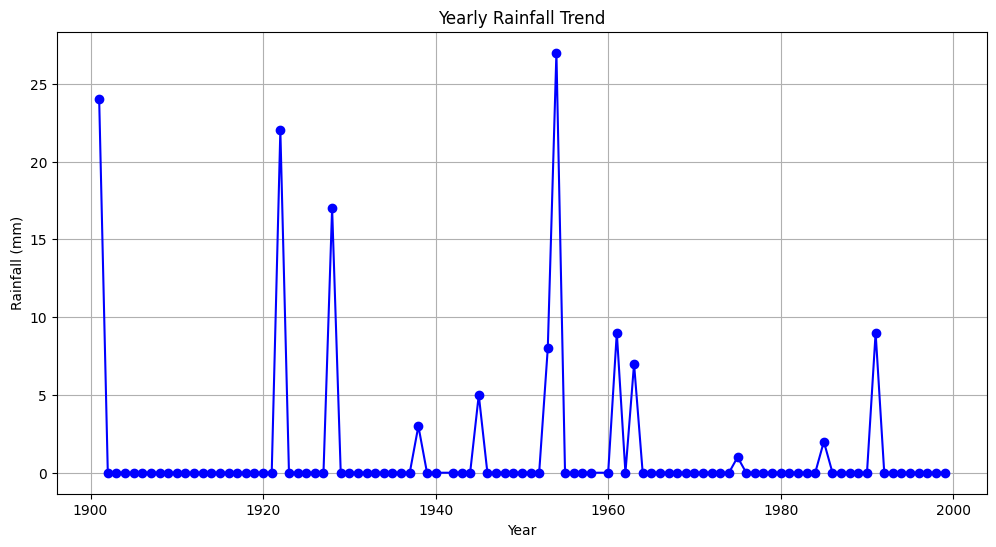

In [5]:

# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Rainfall'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly Rainfall Trend')
plt.grid()
plt.show()


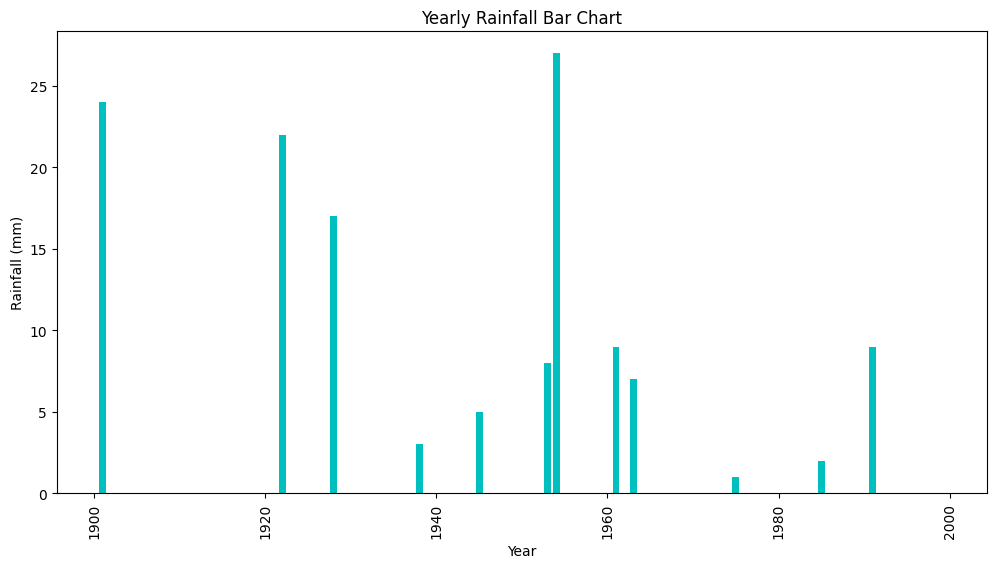

In [6]:

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Rainfall'], color='c')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly Rainfall Bar Chart')
plt.xticks(rotation=90)
plt.show()


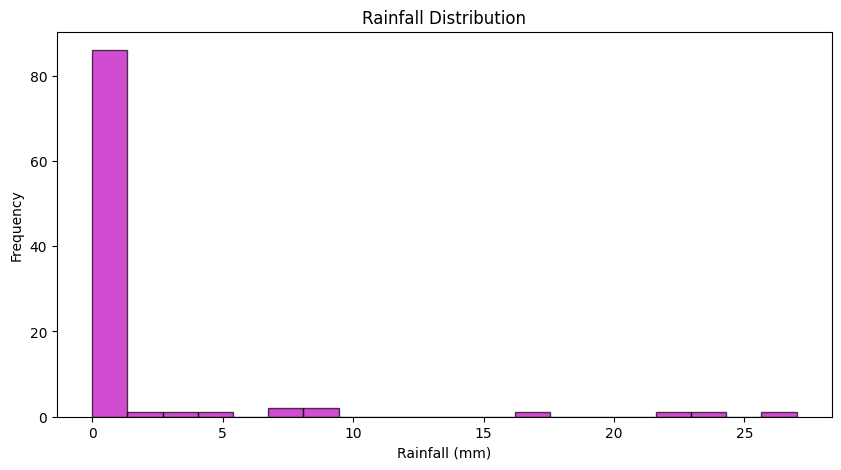

In [7]:

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Rainfall'], bins=20, color='m', edgecolor='k', alpha=0.7)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Rainfall Distribution')
plt.show()


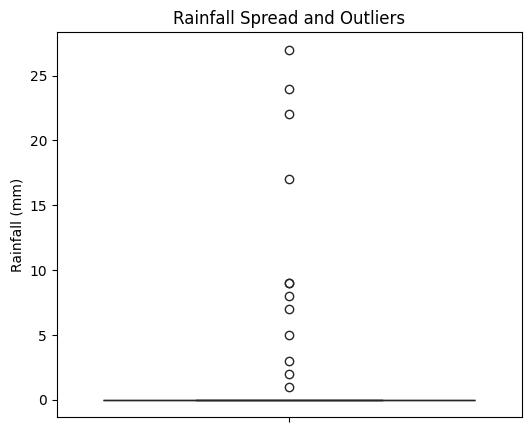

In [8]:

# Box Plot
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['Rainfall'], color='g')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Spread and Outliers')
plt.show()


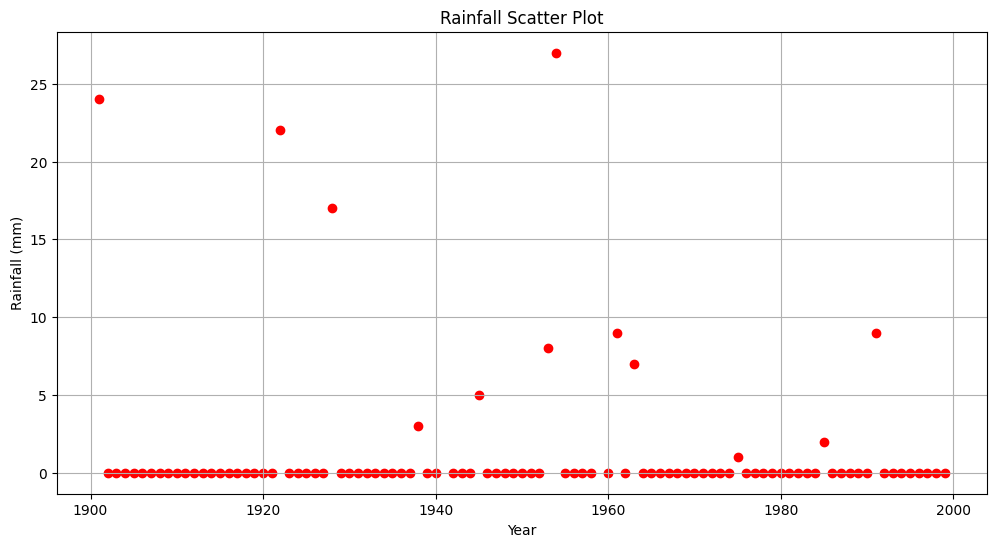

In [9]:

# Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Year'], data['Rainfall'], color='r')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Scatter Plot')
plt.grid()
plt.show()


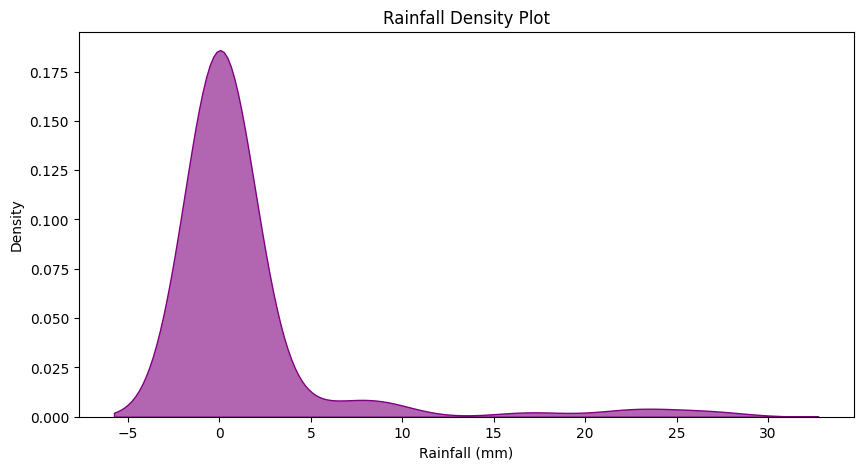

All plots generated successfully!


In [10]:

# Density Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data['Rainfall'], fill=True, color='purple', alpha=0.6)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.title('Rainfall Density Plot')
plt.show()

print("All plots generated successfully!")
